In [14]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid", palette="Set2")

In [15]:
file = open('stat.json')
df = pd.DataFrame(json.load(file)["benchmarks"])
df = df[df['run_type']=='iteration']
df = df[df['family_index'] == 0]

In [16]:
splitted = df["run_name"].str.split("/")
df["size"] = splitted.str[1].astype(int)
df["prob"] = splitted.str[2].astype(int)
df["components"] = splitted.str[3].astype(int)
df = df[["size", "prob", "components", "cpu_time"]]

# Анализ запусков тестов

Время работы программы тестировалось на случайных графах, задаваемых троукой $(size, prob, components)$, где  
$size$ - количество вершин графа  
$components$ - количество случайных компонент связности множества рёбер $R$ из задачи  
$prob$ - вероятность наличия каждого ребра

Построим график зависимости времени работы программы от $size$ для разного количества компонент $components$

(0.0, 100000000.0)

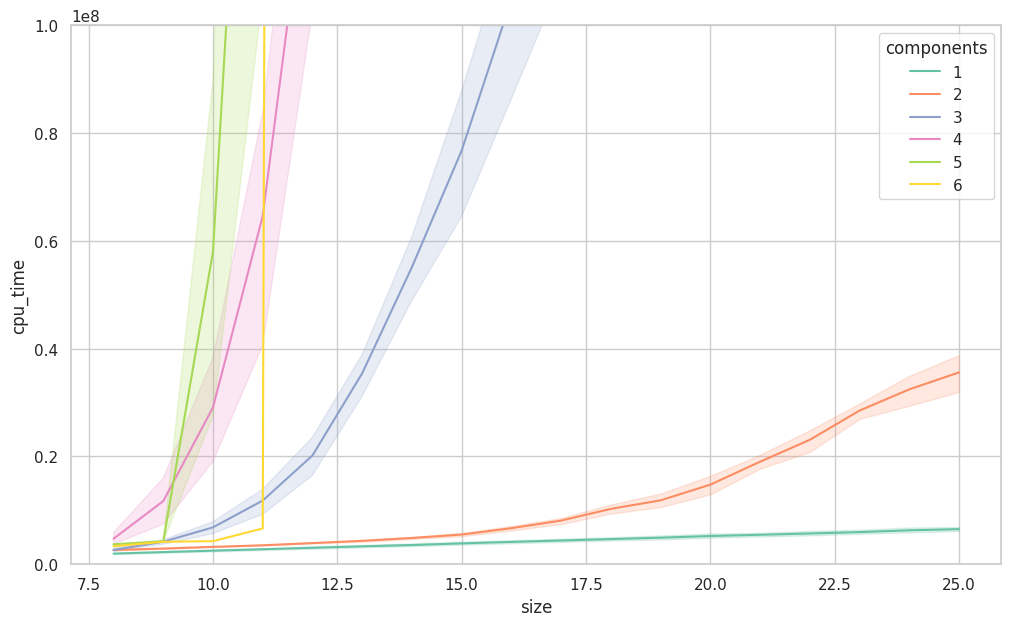

In [17]:
plt.figure(figsize=(12,7))
sns.lineplot(df, x="size", y="cpu_time", hue="components", palette="Set2")
plt.ylim(0,1e8)

Вывод: реальное время работы программы соответсвует теоретической оценке $O(n^{2c-2} \cdot n^3)$

Ещё лучше это видно на графике с логарифмической шкалой

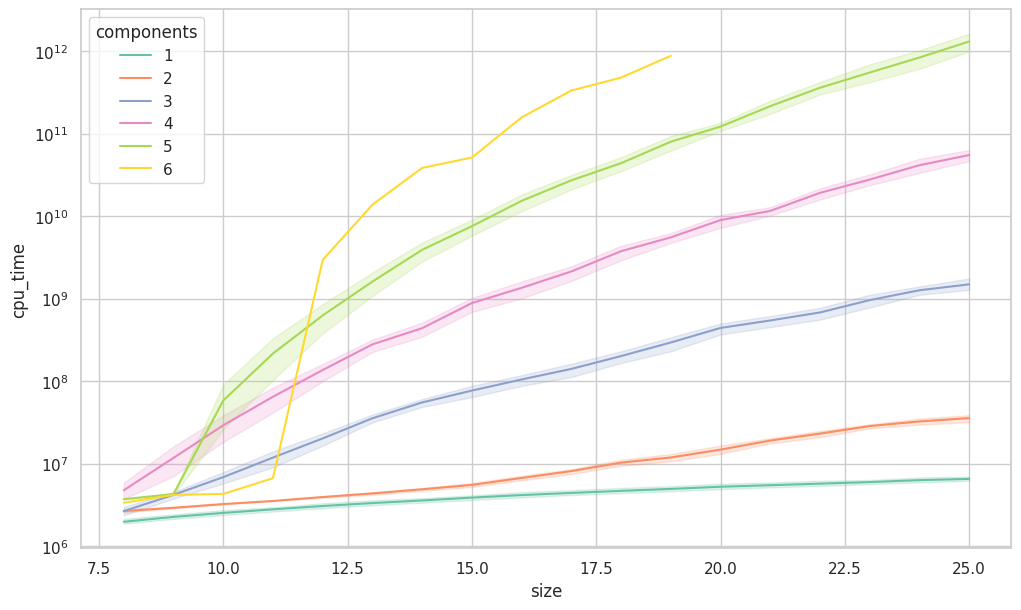

In [18]:
plt.figure(figsize=(12,7))
sns.lineplot(df, x="size", y="cpu_time", hue="components", palette="Set2")
plt.yscale(value='log')

Посмотрим на то, как вероятность появления ребра $prob$ влияет на время работы алгоритма  
Для этого построим графики времени работы программы от кол-ва вершин $size$ для разного кол-ва компонент $components$ и разной $prob$

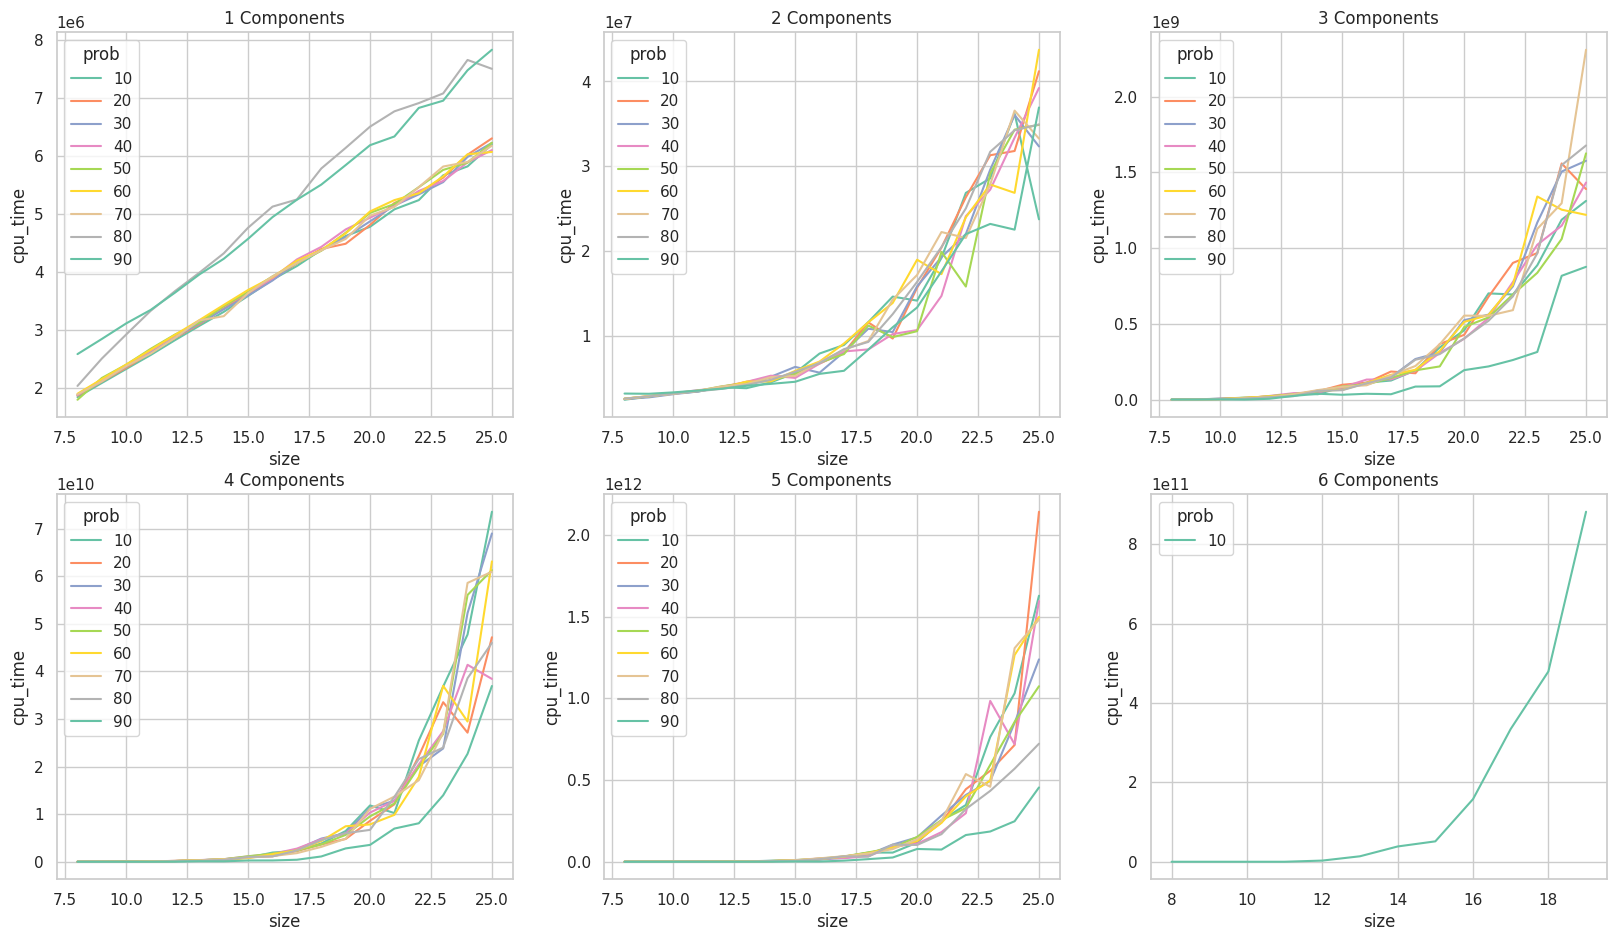

In [19]:
plt.figure(figsize=(20, 11))
for i in range(1, 3):
    for j in range(1, 4):
        plt.subplot(2, 3, (i-1)*3+j)
        plt.title(str((i-1)*3+j) + ' Components')
        sns.lineplot(df[df["components"] == (i-1)*3+j], x="size", y="cpu_time", hue="prob", palette="Set2")

Как и ожидалось, $prob$ не влияет на время программы, так как в ходе её работы мы "достраиваем граф до полного", как описано в доказательстве